#Sentiment Analysis

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset Loading
dataset = pd.read_csv('/content/drive/MyDrive/Reviews.csv')

In [ ]:
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
dataset.shape

(568454, 10)

In [ ]:
dataf = dataset[['Summary','Score', 'Text']]

In [ ]:
dataf = dataf.iloc[:200000, :]

In [ ]:
dataf.describe()

,Score
count,200000.000000
mean,4.173625
std,1.309480
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# Mapping the score column to classes: positive, neutral and negative
dataf['Sentiment'] = dataf['Score'].apply(lambda rating : +1 if rating > 3 else (0 if rating == 3 else -1))

In [ ]:
dataf.tail()

,Summary,Score,Text,Sentiment
199995,Delicious!!!,5,Couldn't find this one in our local grocery. ...,1
199996,Golden Flax All Day :),1,This was the first kind my family and I bought...,-1
199997,Broke Tooth,1,I have healthy 45 year old teeth and broke a l...,-1
199998,Reforming junk food addict,2,You might as well eat the box it came in. If ...,-1
199999,Everything's Just Ducky with this EVO Product ...,5,Let me set the scene for you: three felines in...,1


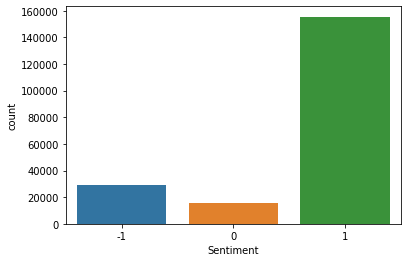

In [ ]:
# Data Analysis
# Checking the frequency of +1, -1 and 0
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x='Sentiment',data=dataf)

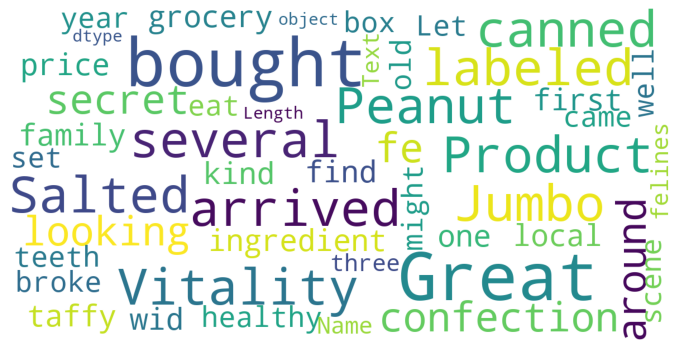

In [ ]:
# Making word cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 1 
    ).generate(str(data))


    fig = plt.figure(1, figsize = (12, 12))
    plt.axis('off')
    

    plt.imshow(wordcloud)

show_wordcloud(dataf['Text'])

In [ ]:
# Data Cleaning
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import word_tokenize

stopwords = set(stopwords.words('english'))
snowballstemmer = SnowballStemmer('english')
processed_positive_words_list = []
processed_negative_words_list = []
processed_neutral_words_list = []
processed_sentence_list = []

for i in dataf.index:
    stemmedwords = []
    text = dataf.iloc[i]['Text']
    
    # Remove HTML Tags
    text = re.sub('<.*?>', ' ', text) 
    
    # Clear punctuation and numbers
    text = re.sub('[^A-Za-z]+', ' ', text)
    
    # Convert all uppercase characters into lowercase
    text = text.lower()
    
    # Tokenize string
    # Removing stopwords
    # Stemming words
    # Checking wordlength
    for words in word_tokenize(text):
        if len(words) > 1 and words not in stopwords:
            stemmedwords.append(snowballstemmer.stem(words))
            
    if dataf.iloc[i]['Sentiment'] == 1:
        processed_positive_words_list += (stemmedwords)
    elif dataf.iloc[i]['Sentiment'] == -1:                
        processed_negative_words_list += (stemmedwords)
    else:
        processed_neutral_words_list += (stemmedwords)

                
    # Joining words
    clean_sentence = " ".join(stemmedwords)
    processed_sentence_list.append(clean_sentence)

In [ ]:
processed_all_words = processed_positive_words_list + processed_negative_words_list + processed_neutral_words_list
print("Total number of words in processed_words_list : ", len(processed_all_words))
print("Total number of sentences in preprocessed_sentence_list : ", len(processed_sentence_list))
print("Total number of positive words : ", len(processed_positive_words_list))
print("Total number of negative words : ", len(processed_negative_words_list))
print("Total number of neutral words : ", len(processed_neutral_words_list))

Total number of words in processed_words_list :  8011594
Total number of sentences in preprocessed_sentence_list :  200000
Total number of positive words :  6013339
Total number of negative words :  1254549
Total number of neutral words :  743706


In [ ]:
dataf['Cleaned_Text'] = processed_sentence_list
dataf.head(2)

,Summary,Score,Text,Sentiment,Cleaned_Text
0,Good Quality Dog Food,5,I have bought several of the Vitality canned d...,1,bought sever vital can dog food product found ...
1,Not as Advertised,1,Product arrived labeled as Jumbo Salted Peanut...,-1,product arriv label jumbo salt peanut peanut a...


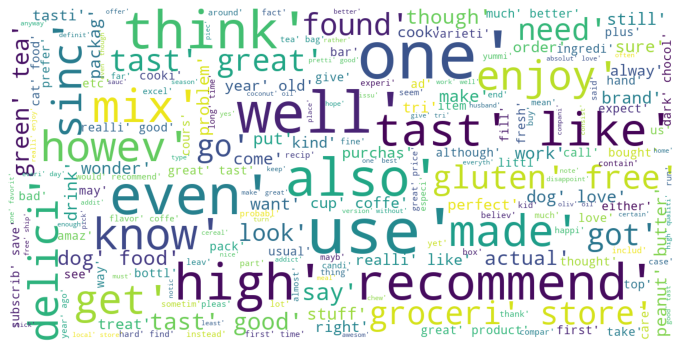

In [ ]:
show_wordcloud(processed_positive_words_list)

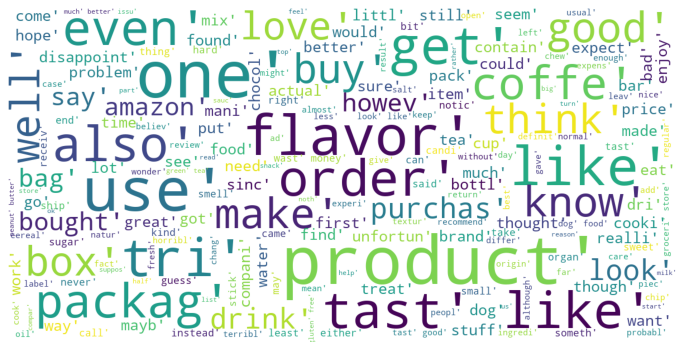

In [ ]:
show_wordcloud(processed_negative_words_list)

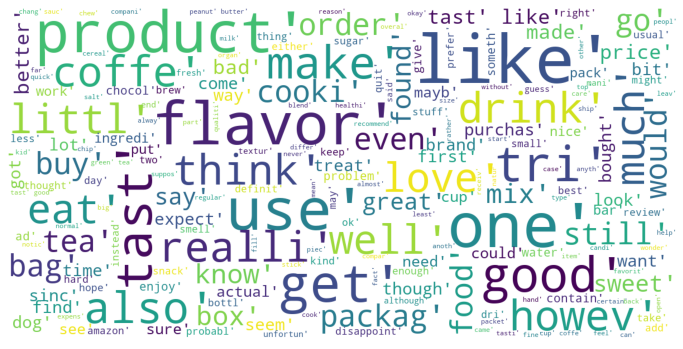

In [ ]:
show_wordcloud(processed_neutral_words_list)

In [ ]:
# Splitting dataset into train and test
index = dataf.index
dataf['random_number'] = np.random.randn(len(index))
train = dataf[dataf['random_number'] <= 0.8]
test = dataf[dataf['random_number'] > 0.8]

In [ ]:
# Feature Extraction
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_matrix = vectorizer.fit_transform(train['Cleaned_Text'])
test_matrix = vectorizer.transform(test['Cleaned_Text'])

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['Sentiment']
y_test = test['Sentiment']

In [ ]:
# Model Training
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train,y_train)
predictions1 = lr.predict(X_test)

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
new = np.asarray(y_test)
confusion_matrix(predictions1, y_test)

array([[ 3857,   663,   875],
       [  343,   764,   464],
       [ 1790,  1877, 31828]])

In [ ]:
# Classification report
confusion_matrix(predictions1, y_test)
print(classification_report(predictions1, y_test))
accuracy_score(predictions1, y_test)

              precision    recall  f1-score   support

          -1       0.64      0.71      0.68      5395
           0       0.23      0.49      0.31      1571
           1       0.96      0.90      0.93     35495

    accuracy                           0.86     42461
   macro avg       0.61      0.70      0.64     42461
weighted avg       0.89      0.86      0.87     42461



0.8584112479687243

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
predictions2 = clf.predict(X_test)
confusion_matrix(predictions2, y_test)
print(classification_report(predictions2, y_test))

accuracy_score(predictions2, y_test)

              precision    recall  f1-score   support

          -1       0.61      0.64      0.62      5729
           0       0.29      0.34      0.31      2830
           1       0.92      0.90      0.91     33902

    accuracy                           0.83     42461
   macro avg       0.61      0.63      0.62     42461
weighted avg       0.84      0.83      0.83     42461



0.8261934481053201

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_train, y_train)
predictions3 = rf.predict(X_test)
confusion_matrix(predictions3, y_test)
print(classification_report(predictions3, y_test))
accuracy_score(predictions3, y_test)

              precision    recall  f1-score   support

          -1       0.42      0.93      0.58      2733
           0       0.26      0.97      0.41       886
           1       1.00      0.85      0.92     38842

    accuracy                           0.86     42461
   macro avg       0.56      0.92      0.64     42461
weighted avg       0.94      0.86      0.89     42461



0.8589293704811474

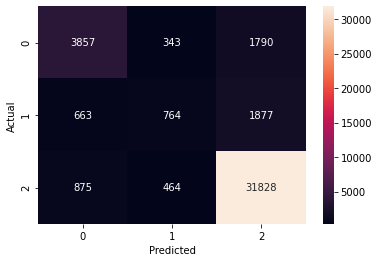

In [ ]:
# Heat map for RF
cm_test = confusion_matrix(y_test, predictions1)
sns.heatmap(cm_test, annot = True, fmt = 'd')
plt.ylabel("Actual") 
plt.xlabel("Predicted") 
plt.show()

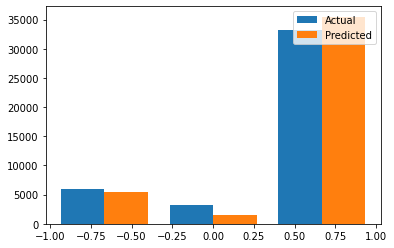

In [ ]:
# Histogram
plt.hist([y_test, predictions1], bins=3, label=['Actual', 'Predicted'])
plt.legend(loc = 'upper right')
plt.show()